# **UCI Heart Disease Prediction**

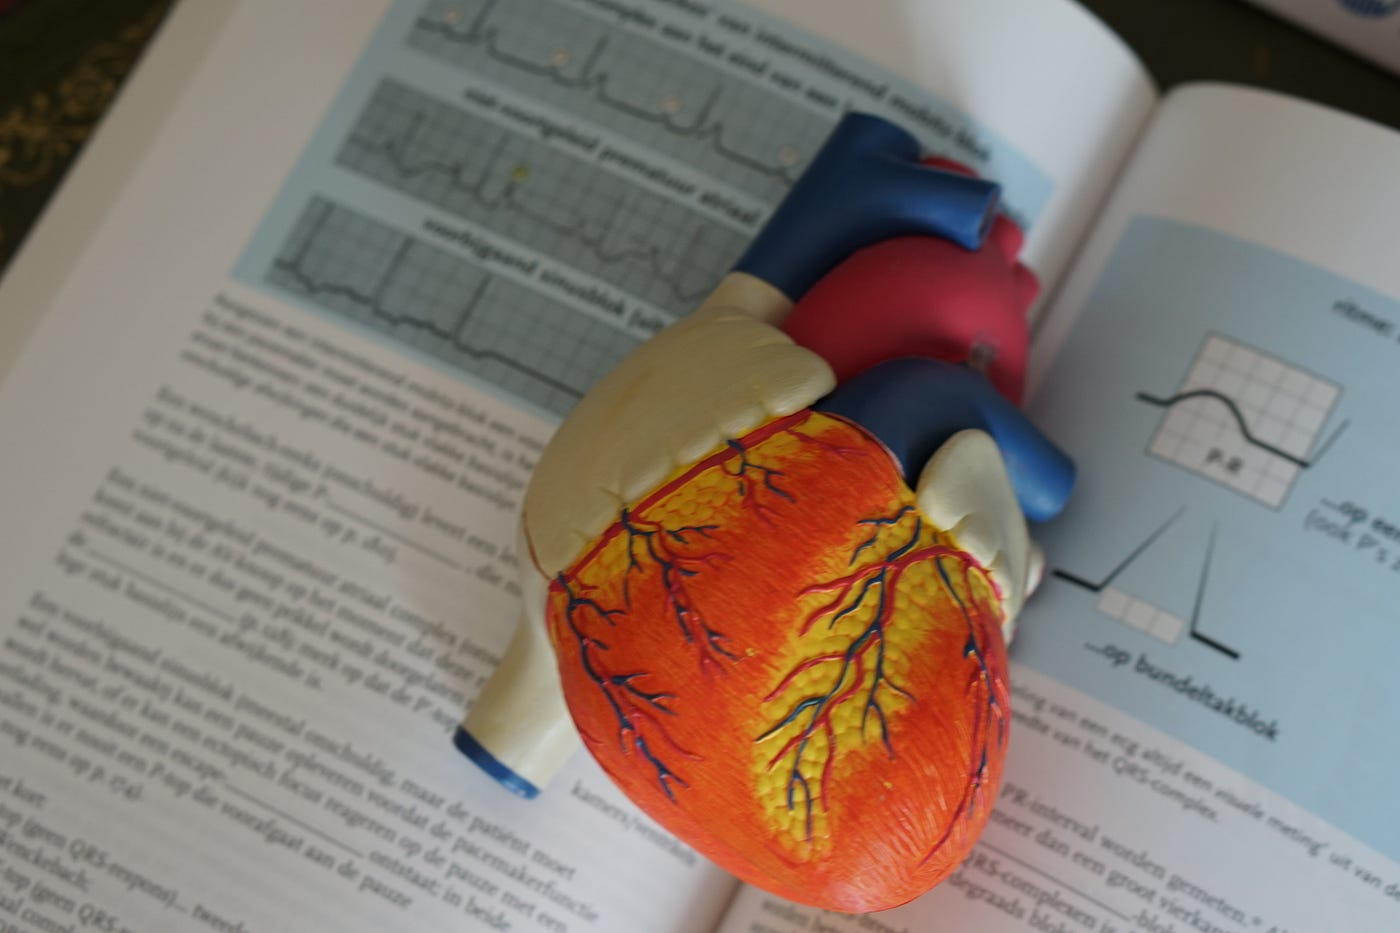

The UCI Heart Disease dataset contains information about individuals who underwent various medical tests and assessments related to heart disease. Each row in the dataset represents a patient, and the columns contain different attributes or features associated with the patient's health status. Below is an explanation of each column in the dataset:

- **id**: An identifier for each patient (unique to each individual).
- **age**: The age of the patient in years.
- **sex**: The gender of the patient (1 = male, 0 = female).
- **dataset**: A categorical variable indicating the dataset the patient belongs to .
- **cp**: Chest pain type experienced by the patient (categorical variable).
- **trestbps**: Resting blood pressure (in mm Hg) of the patient.
- **chol**: Serum cholesterol level (in mg/dl) of the patient.
- **fbs**: Fasting blood sugar level > 120 mg/dl (1 = true, 0 = false).
- **restecg**: Resting electrocardiographic results (categorical variable).
- **thalch**: Maximum heart rate achieved during exercise.
- **exang**: Exercise-induced angina (1 = yes, 0 = no).
- **oldpeak**: ST depression induced by exercise relative to rest.
- **slope**: The slope of the peak exercise ST segment.
- **ca**: Number of major vessels colored by fluoroscopy (0-3).
- **thal**: Thalassemia (a blood disorder) type (categorical variable).
- **num**: Presence of heart disease (the target variable):
  - Values 0: No heart disease
  - Values 1-4: Different degrees of heart disease severity

This dataset is often used for classification tasks where the goal is to predict the presence or absence of heart disease based on the patient's attributes. It can also be used for exploratory data analysis and predictive modeling to better understand factors associated with heart disease.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape

(920, 16)

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

<Axes: >

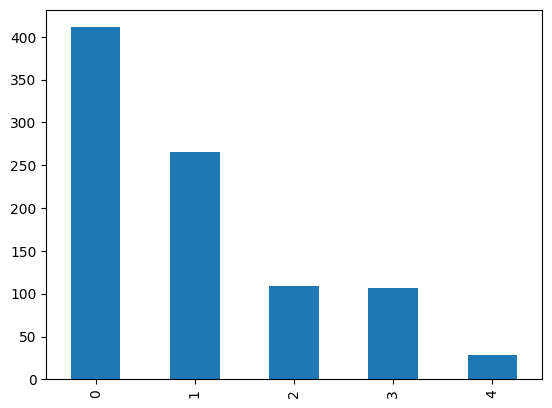

In [ ]:
df['num'].value_counts().plot(kind = 'bar')

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
df['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [ ]:
df['slope'].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [ ]:
df['exang'].value_counts()

False    528
True     337
Name: exang, dtype: int64

In [ ]:
df['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [ ]:
df['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [ ]:

# mean imputation df['chol']
chol_value = df['chol'].mean()
df['chol'].fillna(chol_value, inplace=True)

# mean imputation df['trestbps']
trestbps_mean = df['trestbps'].mean()
df['trestbps'].fillna(trestbps_mean, inplace = True)

# mode imputation df['fbs']
fbs_mode = df['fbs'].mode()[0]
df['fbs'].fillna(fbs_mode, inplace = True)

# mode imputation df['restecg']
restecg_mode = df['restecg'].mode()[0]
df['restecg'].fillna(restecg_mode, inplace = True)

# mode imputation df['exang']
exang_mode = df['exang'].mode()[0]
df['exang'].fillna(exang_mode, inplace = True)

# mode imputation df['exang']
slope_mode = df['slope'].mode()[0]
df['slope'].fillna(slope_mode, inplace = True)

# mean imputation df['thalch']
thalch_mean = df['thalch'].mean()
df['thalch'].fillna(thalch_mean, inplace = True)


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as needed
df['oldpeak'] = imputer.fit_transform(df[['oldpeak']])

In [ ]:
df.drop(['ca', 'thal'], axis = 1, inplace = True)

In [ ]:
df.drop(['dataset'], axis = 1, inplace = True)

In [ ]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


# **Encoding Categorical Columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for 'sex' column
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
sex_encoded = one_hot_encoder.fit_transform(df[['sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=['female'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Label Encoding for 'exang' and 'fbs' columns
label_encoder = LabelEncoder()
df['exang'] = label_encoder.fit_transform(df['exang'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])

In [ ]:
# One-Hot Encoding for 'restecg' column
restecg_encoded = pd.get_dummies(df['restecg'], prefix='restecg')

In [ ]:
#  Ordinal Encoding for 'slope' column
slope_mapping = {'flat': 0, 'upsloping': 1, 'downsloping': 2}
df['slope'] = df['slope'].map(slope_mapping)

In [ ]:
# One-Hot Encoding for 'cp' column
cp_encoded = pd.get_dummies(df['cp'], prefix='cp')

In [ ]:
# Concatenate encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(columns=['sex', 'exang', 'fbs', 'restecg', 'slope', 'cp']),
                        sex_encoded_df, restecg_encoded, cp_encoded],
                        axis=1)

In [ ]:
df_encoded.head()

,id,age,trestbps,chol,thalch,oldpeak,num,female,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,145.0,233.0,150.0,2.3,0,1.0,1,0,0,0,0,0,1
1,2,67,160.0,286.0,108.0,1.5,2,1.0,1,0,0,1,0,0,0
2,3,67,120.0,229.0,129.0,2.6,1,1.0,1,0,0,1,0,0,0
3,4,37,130.0,250.0,187.0,3.5,0,1.0,0,1,0,0,0,1,0
4,5,41,130.0,204.0,172.0,1.4,0,0.0,1,0,0,0,1,0,0


In [ ]:
X = df_encoded.drop(columns=['num'])
Y = df_encoded['num']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # k values
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'p': [1, 2]  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
}


knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')


In [ ]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Score: 0.6222467365324509


In [ ]:
best_knn = grid_search.best_estimator_


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the testing set using the best estimator
y_pred = best_knn.predict(x_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.95      0.74        75
           1       0.54      0.41      0.46        54
           2       0.23      0.12      0.16        25
           3       0.25      0.12      0.16        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.32      0.32      0.30       184
weighted avg       0.47      0.54      0.48       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Summary of Classification Report:**

This classification report provides a comprehensive assessment of a model designed to predict heart disease using the UCI Heart Disease dataset. Rather than solely focusing on high accuracy, the goal of this model was to showcase the utilization of diverse classification metrics for a nuanced evaluation. Here's a succinct overview of the key findings:

- **Multifaceted Evaluation:** The report delves into precision, recall, and F1-score across multiple disease classes, offering a nuanced understanding of the model's performance.

- **Diagnostic Precision:** Notably, the model exhibits strong precision in identifying instances of class 0, aligning with the critical need for accurate heart disease diagnosis.

- **Challenges and Opportunities:** While the model encounters difficulties in distinguishing between less prevalent disease classes, such as classes 2, 3, and 4, these challenges present opportunities for targeted improvement.

- **Strategic Insights:** By prioritizing a balanced assessment over raw accuracy, this analysis provides strategic insights for refining the model's disease classification capabilities.

- **Educational Value:** Beyond numerical metrics, this report serves as a valuable educational resource, illustrating the practical application of varied classification metrics in healthcare analytics.

**Conclusion:**

In the realm of medical diagnostics, precision and context are paramount. This report underscores the importance of holistic model evaluation, demonstrating how diverse classification metrics can offer nuanced insights into disease prediction models. By embracing a multifaceted approach, stakeholders can gain a deeper understanding of model performance and drive informed decisions to enhance healthcare outcomes.